In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
loan_df = pd.read_csv('loan\\loan.csv', low_memory=False)

# Data understanding

In [5]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [115]:
# check the details about rows, columns with data type 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [116]:
# Number of rows and columns in the dataframe
loan_df.shape

(39717, 111)

In [5]:
# Check for null values
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# view top rows in the dataframe
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [119]:
# check columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [118]:
# Find if there is any missing value in the state column
loan_df['addr_state'].isnull().sum()

0

In [117]:
# Check the zipcode column data sanity checking whether this needs to be imputed
zip_code_value = loan_df['zip_code'].unique()
zip_code_value_sample = zip_code_value[:10]
zip_code_value_sample, len(zip_code_value)

(array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
        '900xx', '958xx', '774xx'], dtype=object),
 823)

## Missing value analysis

In [12]:
# Analyzing Missing Values in the DataFrame

# Percentage of missing values for each column
missing_values_percent = loan_df.isnull().mean() * 100

# Columns with more than 90% missing values
columns_with_90_percent_missing = missing_values_percent[missing_values_percent > 90].sort_values(ascending=False)

# Analyzing rows with missing values
# Count of missing values in each row
rows_missing_values = loan_df.isnull().sum(axis=1)

# Data types of the columns
data_types = loan_df.dtypes

columns_with_90_percent_missing, rows_missing_values.describe(), data_types


(mo_sin_old_rev_tl_op              100.000000
 num_op_rev_tl                     100.000000
 mort_acc                          100.000000
 mths_since_recent_bc              100.000000
 mths_since_recent_bc_dlq          100.000000
 mths_since_recent_inq             100.000000
 mths_since_recent_revol_delinq    100.000000
 num_accts_ever_120_pd             100.000000
 num_actv_bc_tl                    100.000000
 num_actv_rev_tl                   100.000000
 num_bc_sats                       100.000000
 num_bc_tl                         100.000000
 num_il_tl                         100.000000
 num_rev_accts                     100.000000
 mo_sin_rcnt_rev_tl_op             100.000000
 num_rev_tl_bal_gt_0               100.000000
 num_sats                          100.000000
 num_tl_120dpd_2m                  100.000000
 num_tl_30dpd                      100.000000
 num_tl_90g_dpd_24m                100.000000
 num_tl_op_past_12m                100.000000
 pct_tl_nvr_dlq                   

In [13]:
# List of columns with more than 90% missing values
columns_with_90_percent_missing_list = columns_with_90_percent_missing.index.tolist()
columns_with_90_percent_missing_list


['mo_sin_old_rev_tl_op',
 'num_op_rev_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_rev_accts',
 'mo_sin_rcnt_rev_tl_op',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'mo_sin_rcnt_tl',
 'total_il_high_credit_limit',
 'il_util',
 'mths_since_last_major_derog',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'mo_sin_old_il_acct',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_c

### Drop column with more than 90% missing value

In [15]:
# Dropping columns with more than 90% missing values from the loan data
loan_data_cleaned = loan_df.drop(columns=columns_with_90_percent_missing_list)

# Display the shape of the DataFrame after dropping the columns
loan_data_cleaned.shape


(39717, 55)

### Fix data type of columns

In [16]:
# Fixing the data type of the 'term' column by extracting numerical values and converting to integer
loan_data_cleaned['term'] = loan_data_cleaned['term'].str.extract('(\d+)').astype(int)

# Verifying the conversion by displaying the data type of 'term' and a few sample values
term_data_type = loan_data_cleaned['term'].dtype
term_sample_values = loan_data_cleaned['term'].head()

term_data_type, term_sample_values


(dtype('int32'),
 0    36
 1    60
 2    36
 3    36
 4    60
 Name: term, dtype: int32)

In [17]:
# Removing the percentage sign and converting to float for 'int_rate'
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.replace('%', '').astype(float)

# Removing the percentage sign and converting to float for 'revol_util'
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].str.replace('%', '').astype(float)

# Displaying the data types and sample values for both columns to verify the conversion
print(loan_data_cleaned['int_rate'].dtype, loan_data_cleaned['int_rate'].head())
print(loan_data_cleaned['revol_util'].dtype, loan_data_cleaned['revol_util'].head())


float64 0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64
float64 0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64


In [18]:
# Converting 'emp_length' to a numeric value by extracting the number of years
import numpy as np

# Custom function to convert employment length to numeric
def convert_emp_length(emp_length_str):
    if pd.isnull(emp_length_str):
        return np.nan  # Return NaN for missing values
    elif '< 1 year' in emp_length_str:
        return 0  # Less than 1 year is considered as 0
    elif '10+' in emp_length_str:
        return 10  # 10+ years is considered as 10
    else:
        # Extract the number of years and convert to integer
        return int(emp_length_str.replace(' years', '').replace(' year', ''))

# Apply the conversion function to the 'emp_length' column
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].apply(convert_emp_length)

# Verify the conversion by displaying the unique values of the converted column
unique_emp_lengths = loan_data_cleaned['emp_length'].unique()

unique_emp_lengths


array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

### datetime conversion for column issue_d

In [19]:

# Copying to new dataframe to preserve oroginal datafarme
loan_df2 = loan_data_cleaned.copy()

# Step 1: Inspect unique values 
print(loan_df2['issue_d'].unique()[:10])

# Step 2: Try conversion with coercion to identify unparseable dates
loan_df2['issue_d'] = pd.to_datetime(loan_df2['issue_d'], format='%b-%y', errors='coerce')

# Step 3: Find rows where the conversion resulted in NaT
nat_rows = loan_df2[loan_df2['issue_d'].isna()]

# Inspecting the rows with NaT values to identify potential malformed strings
print(nat_rows[['issue_d']])

# Count of NaT values to understand the extent of the issue
nat_count = nat_rows['issue_d'].isna().sum()
print(f"Count of unparseable or missing dates: {nat_count}")


['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11']
Empty DataFrame
Columns: [issue_d]
Index: []
Count of unparseable or missing dates: 0


### datetime conversion for column earliest_cr_line

In [20]:
print(loan_df2['earliest_cr_line'].unique()[:10])

# Step 2: Try conversion with coercion to identify unparseable dates
loan_df2['earliest_cr_line'] = pd.to_datetime(loan_df2['earliest_cr_line'], format='%b-%y', errors='coerce')

# Step 3: Find rows where the conversion resulted in NaT
nat_rows = loan_df2[loan_df2['earliest_cr_line'].isna()]

# Inspecting the rows with NaT values to identify potential malformed strings
print(nat_rows[['earliest_cr_line']])

# Count of NaT values to understand the extent of the issue
nat_count = nat_rows['earliest_cr_line'].isna().sum()
print(f"Count of unparseable or missing dates: {nat_count}")

['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04']
Empty DataFrame
Columns: [earliest_cr_line]
Index: []
Count of unparseable or missing dates: 0


### dataetime conversion for column last_pymnt_d

In [34]:
print(loan_df2['last_pymnt_d'].unique()[:10])

# Step 2: Try conversion with coercion to identify unparseable dates
loan_df2['last_pymnt_d'] = pd.to_datetime(loan_df2['last_pymnt_d'], format='%b-%y', errors='coerce')

# Step 3: Find rows where the conversion resulted in NaT
nat_rows = loan_df2[loan_df2['last_pymnt_d'].isna()]

# Inspecting the rows with NaT values to identify potential malformed strings
print(nat_rows[['last_pymnt_d']])

# Count of NaT values to understand the extent of the issue
nat_count = nat_rows['last_pymnt_d'].isna().sum()
print(f"Count of unparseable or missing dates: {nat_count}")

['Jan-15' 'Apr-13' 'Jun-14' 'May-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13']
      last_pymnt_d
26             NaT
2724           NaT
3613           NaT
3985           NaT
4206           NaT
...            ...
36185          NaT
36206          NaT
36209          NaT
36937          NaT
37911          NaT

[71 rows x 1 columns]
Count of unparseable or missing dates: 71


### Drop rows with missing value

In [121]:

#loan_df3 = loan_df2.copy()

# Dropping rows where 'last_pymnt_d_converted' is NaT (i.e., where the conversion resulted in NaT)
loan_df2 = loan_df2.dropna(subset=['last_pymnt_d'])

# Verifying the operation by checking for remaining NaT values in 'last_pymnt_d_converted'
remaining_nat_count = loan_df2['last_pymnt_d'].isna().sum()
print(f"Remaining Count of NaT values in 'last_pymnt_d_converted': {remaining_nat_count}")


Remaining Count of NaT values in 'last_pymnt_d_converted': 0


### datetime conversion for the column last_credit_pull_d

In [22]:
print(loan_df2['last_credit_pull_d'].unique()[:10])

# Step 2: Try conversion with coercion to identify unparseable dates
loan_df2['last_credit_pull_d'] = pd.to_datetime(loan_df2['last_credit_pull_d'], format='%b-%y', errors='coerce')

# Step 3: Find rows where the conversion resulted in NaT
nat_rows = loan_df2[loan_df2['last_credit_pull_d'].isna()]

# Inspecting the rows with NaT values to identify potential malformed strings
print(nat_rows[['last_credit_pull_d']])

# Count of NaT values to understand the extent of the issue
nat_count = nat_rows['last_credit_pull_d'].isna().sum()
print(f"Count of unparseable or missing dates: {nat_count}")

['May-16' 'Sep-13' 'Apr-16' 'Jan-16' 'Dec-14' 'Aug-12' 'Mar-13' 'Dec-15'
 'Aug-13' 'Nov-12']
      last_credit_pull_d
26025                NaT
39476                NaT
Count of unparseable or missing dates: 2


### drop missing values from the rows

In [26]:
# Dropping rows where 'last_pymnt_d_converted' is NaT (i.e., where the conversion resulted in NaT)
loan_df2 = loan_df2.dropna(subset=['last_credit_pull_d'])

# Verifying the operation by checking for remaining NaT values in 'last_pymnt_d_converted'
remaining_nat_count = loan_df2['last_credit_pull_d'].isna().sum()
print(f"Remaining Count of NaT values in 'last_pymnt_d_converted': {remaining_nat_count}")

Remaining Count of NaT values in 'last_pymnt_d_converted': 0


In [39]:
# Displaying the data types and sample values for these columns to verify the conversion
print(loan_df2[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].dtypes)
print(loan_df2[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].head())


issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object
     issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0 2011-12-01       1985-01-01   2015-01-01         2016-05-01
1 2011-12-01       1999-04-01   2013-04-01         2013-09-01
2 2011-12-01       2001-11-01   2014-06-01         2016-05-01
3 2011-12-01       1996-02-01   2015-01-01         2016-04-01
4 2011-12-01       1996-01-01   2016-05-01         2016-05-01


# Data imputation

### Data imputation for numerical columns

In [24]:
# Identifying numerical columns in the cleaned dataframe
numerical_columns = loan_df2.select_dtypes(include=['int64', 'float64']).columns

# Imputing missing values in numerical columns with their respective median values
for column in numerical_columns:
    median_value = loan_df2[column].median()
    loan_df2[column].fillna(median_value, inplace=True)

# Check if any numerical columns still have missing values after imputation
missing_after_imputation = loan_df2[numerical_columns].isnull().sum()

missing_after_imputation


id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
emp_length                    0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
chargeof

### Data imputation for categorical columns

In [36]:
# Identifying categorical columns in the  dataframe
categorical_columns = loan_df2.select_dtypes(include=['object']).columns

# Imputing missing values in categorical columns with their respective mode values
for column in categorical_columns:
    mode_value = loan_df2[column].mode()[0]  # mode() returns a Series, [0] accesses the first mode
    loan_df2[column].fillna(mode_value, inplace=True)

# Check if any categorical columns still have missing values after imputation
missing_after_imputation_categorical = loan_df2[categorical_columns].isnull().sum()

missing_after_imputation_categorical


grade                  0
sub_grade              0
emp_title              0
home_ownership         0
verification_status    0
loan_status            0
pymnt_plan             0
url                    0
desc                   0
purpose                0
title                  0
zip_code               0
addr_state             0
initial_list_status    0
last_pymnt_d           0
application_type       0
dtype: int64

In [37]:
categorical_columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status',
       'last_pymnt_d', 'application_type'],
      dtype='object')

In [38]:
# Check for any missing values in the entire dataframe after imputation
total_missing_values_after_imputation = loan_df2.isnull().sum().sum()

total_missing_values_after_imputation


0

# Outlier treatment

#### Box plot for Outlier treatment on columns 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'installment'

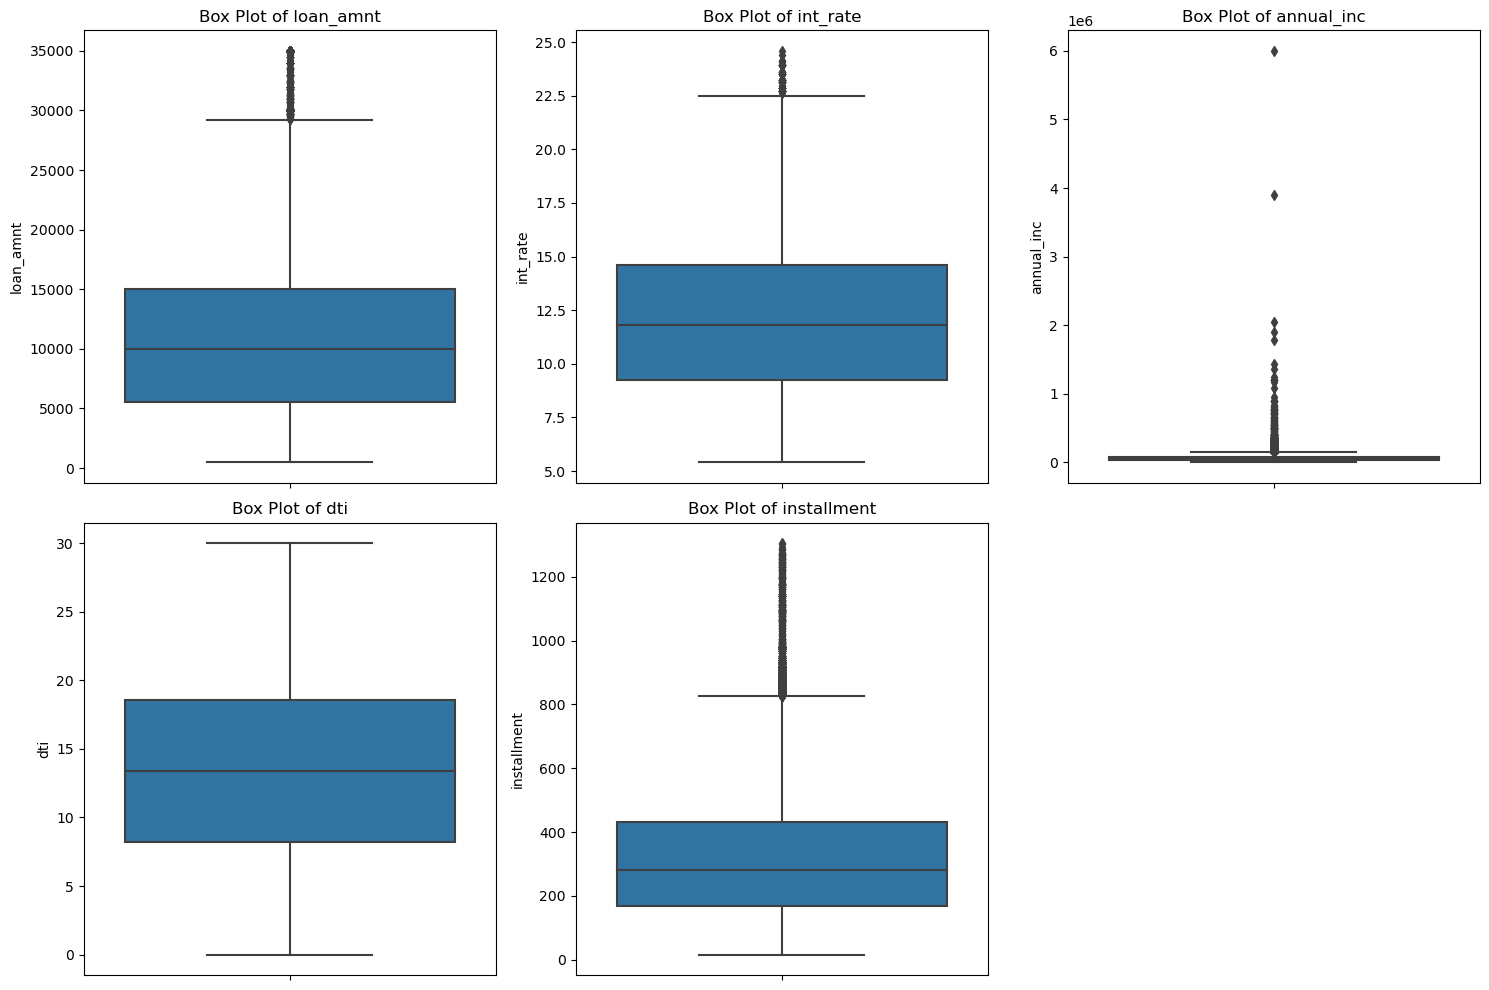

In [47]:
# Outlier treatment
#columns for  box plots
columns_to_plot = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'installment']

# Set the size of the overall figure
plt.figure(figsize=(15, 10))

# Loop through each column and create a subplot for each box plot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=loan_df2[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)  # Set the y-axis label to the column name

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
#  Outlier treatment for annual income


loan_df3 = loan_df2.copy()

q_low = loan_df2['annual_inc'].quantile(0.01)
q_high = loan_df2['annual_inc'].quantile(0.99)

loan_df2['annual_inc'] = np.where(loan_df2['annual_inc'] < q_low, q_low, loan_df2['annual_inc'])
loan_df2['annual_inc'] = np.where(loan_df2['annual_inc'] > q_high, q_high, loan_df2['annual_inc'])


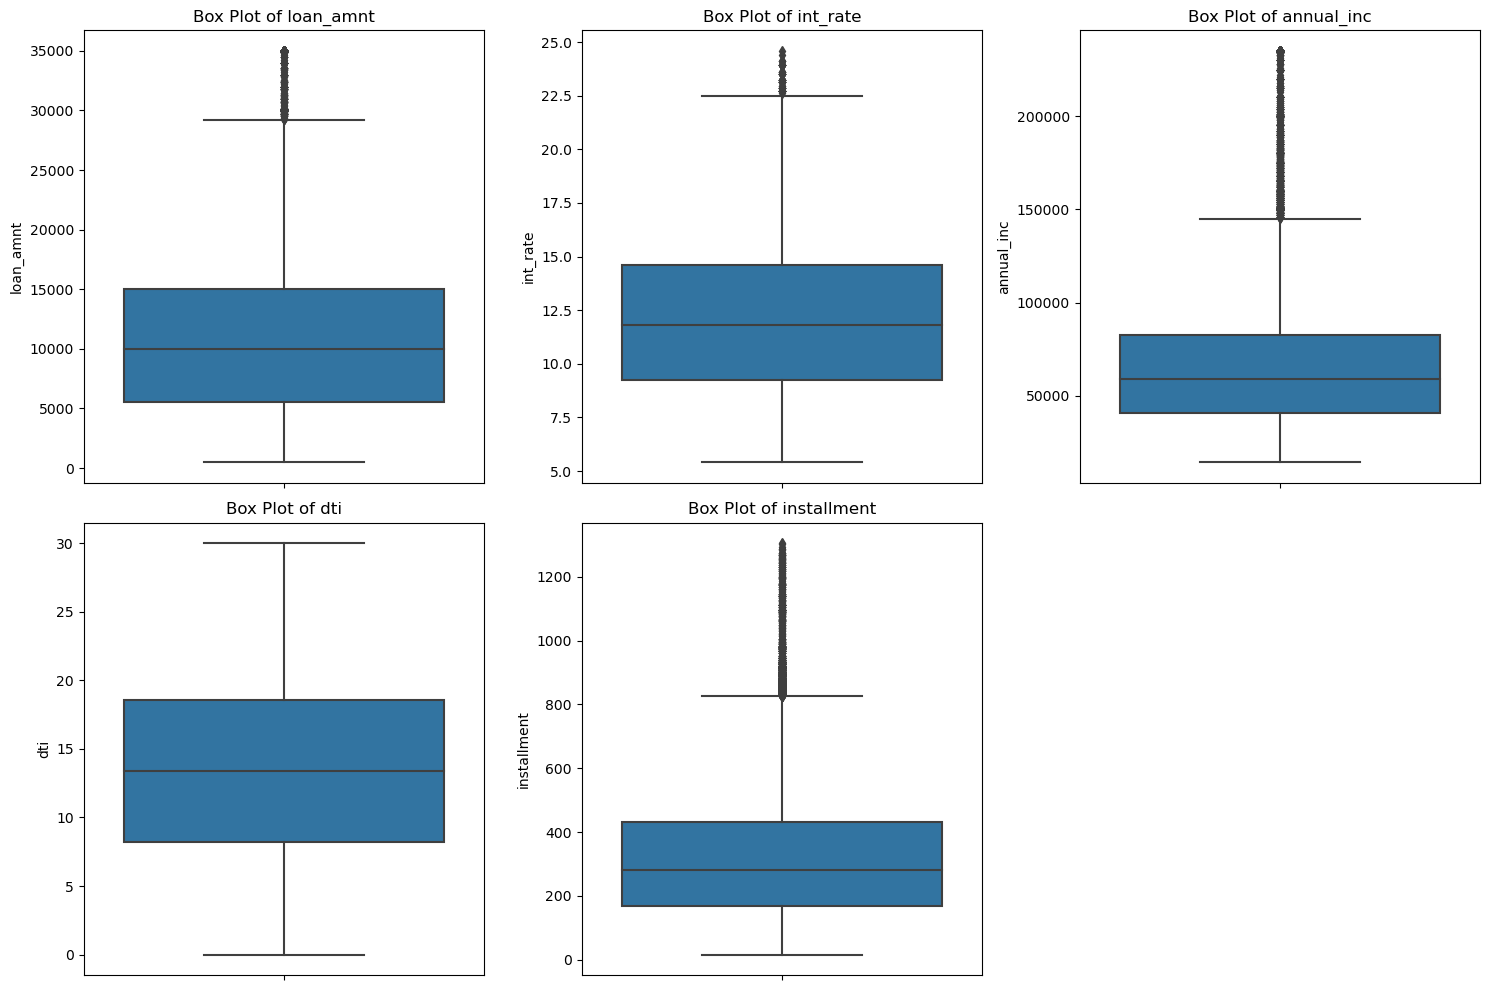

In [54]:

#columns for  box plots
columns_to_plot = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'installment']

# Set the size of the overall figure
plt.figure(figsize=(15, 10))

# Loop through each column and create a subplot for each box plot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=loan_df2[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)  # Set the y-axis label to the column name

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Univariate Analysis

## Univariate Analysis for Quantitative variables

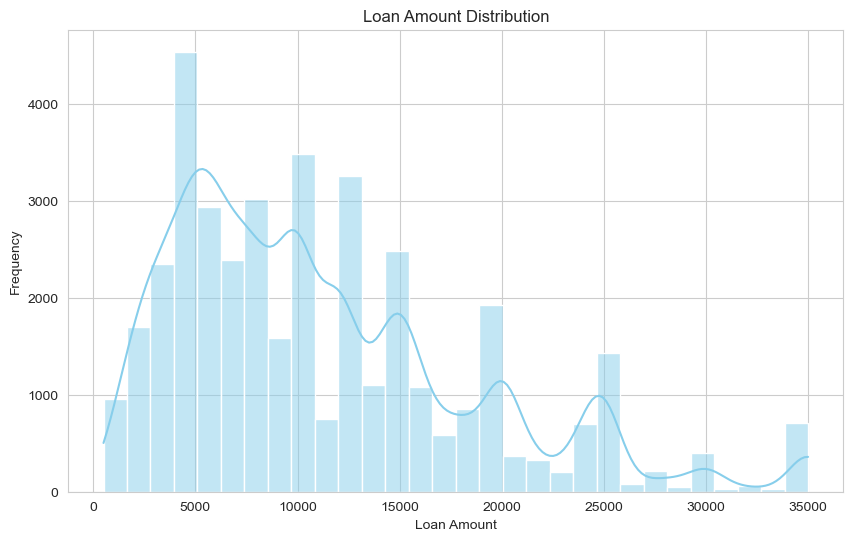

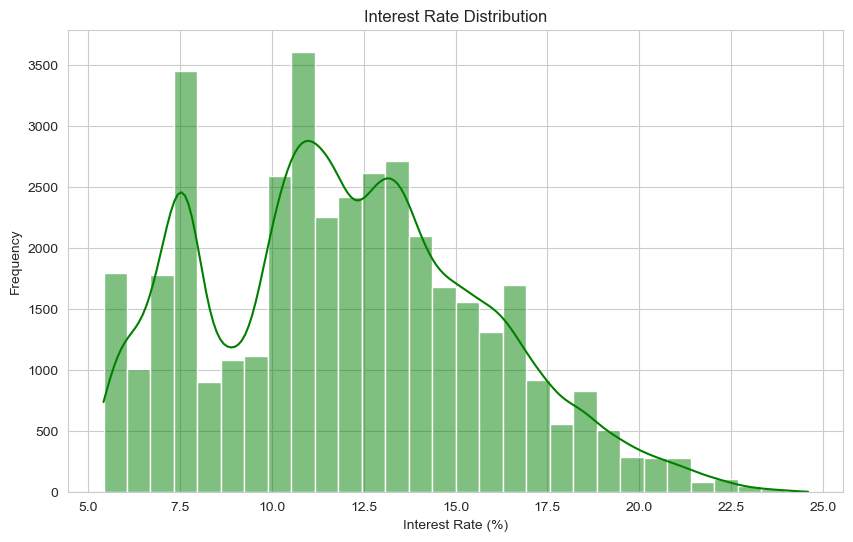

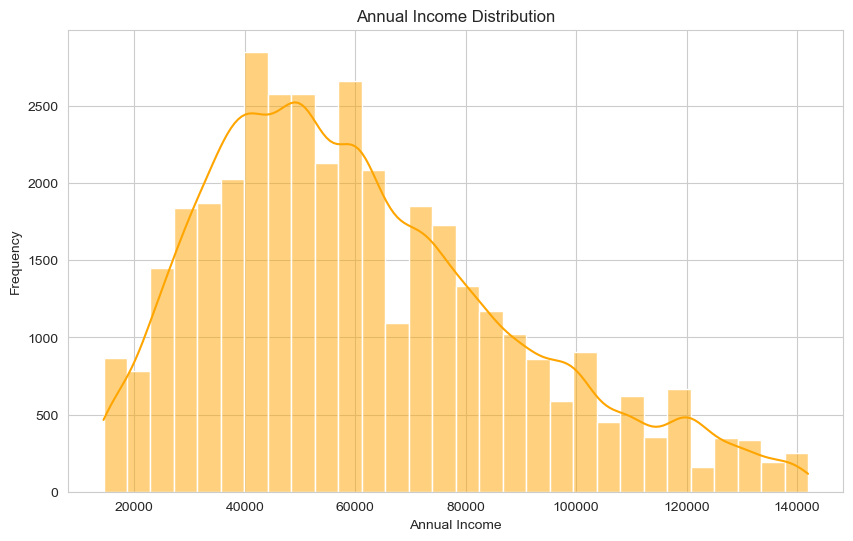

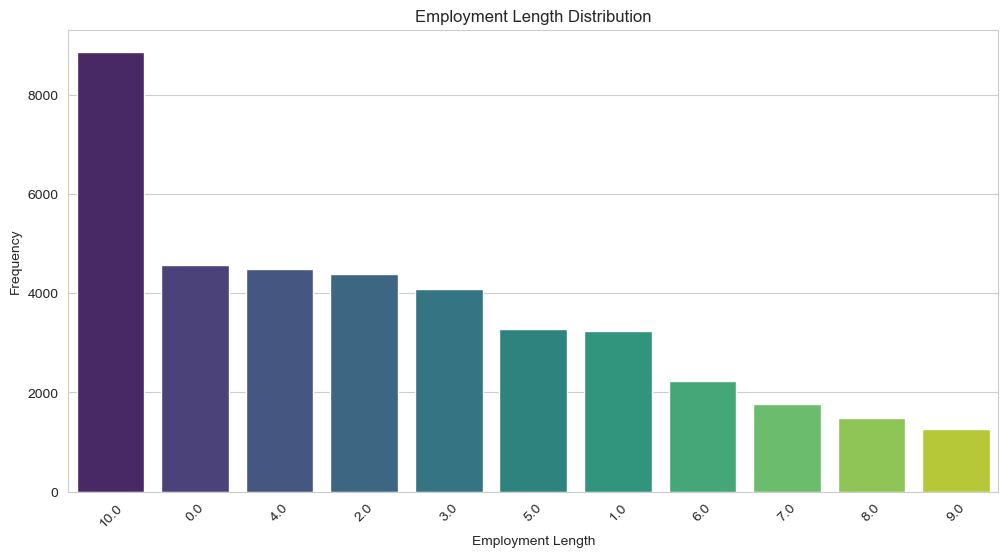

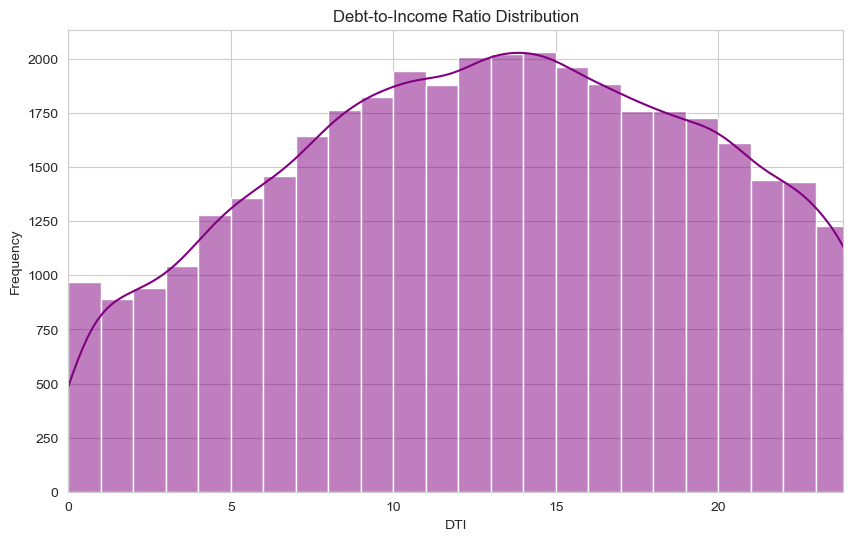

In [55]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Loan Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_df2['loan_amnt'], bins=30, kde=True, color='skyblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Interest Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_df2['int_rate'], bins=30, kde=True, color='green')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Annual Income Distribution (with a focus on the lower 95% of income to exclude extreme outliers)
plt.figure(figsize=(10, 6))
filtered_income = loan_df2[loan_df2['annual_inc'] < loan_df2['annual_inc'].quantile(0.95)]
sns.histplot(filtered_income['annual_inc'], bins=30, kde=True, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Employment Length Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', data=loan_df2, order = loan_df2['emp_length'].value_counts().index, palette='viridis')
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Debt-to-Income Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_df2['dti'], bins=30, kde=True, color='purple')
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.xlim(0, loan_df2['dti'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

## Univariate analysis on unordered categorical variables.

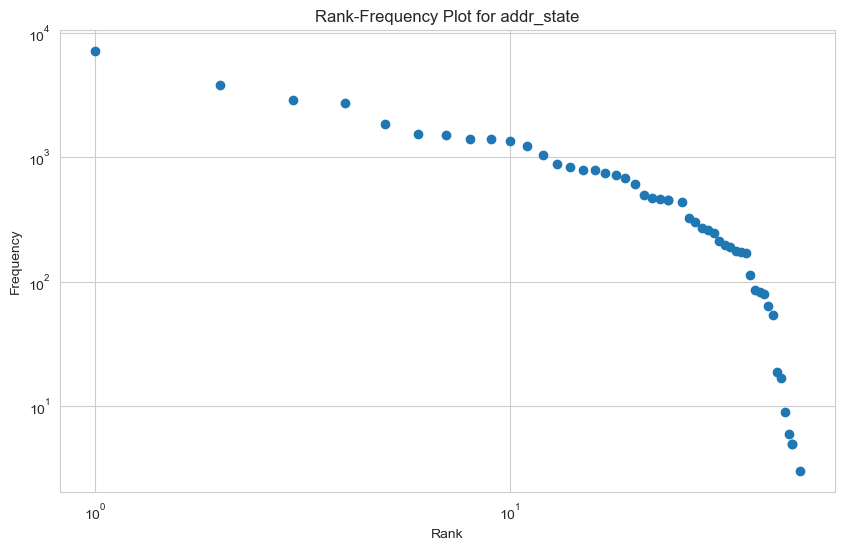

In [56]:

state_counts = loan_df2['addr_state'].value_counts()
state_ranks = state_counts.rank(ascending=False, method='min')

plt.figure(figsize=(10, 6))
plt.scatter(state_ranks, state_counts)
plt.title('Rank-Frequency Plot for addr_state')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


In [57]:


state_counts = loan_df2['addr_state'].value_counts()

# Create a DataFrame from the state counts
state_counts_df = pd.DataFrame(state_counts).reset_index()
state_counts_df.columns = ['State', 'Frequency']

# Assign ranks based on frequency
state_counts_df['Rank'] = state_counts_df['Frequency'].rank(ascending=False, method='min')

# Sort the DataFrame by rank for better readability
state_counts_df = state_counts_df.sort_values(by='Rank')

# Display the table
print(state_counts_df.head())  # Adjust or remove .head() to view more or all rows


  State  Frequency  Rank
0    CA       7078   1.0
1    NY       3804   2.0
2    FL       2863   3.0
3    TX       2719   4.0
4    NJ       1847   5.0


# Univariate Analysis for Ordered Categorical variable

## Distribution plot on home_ownership

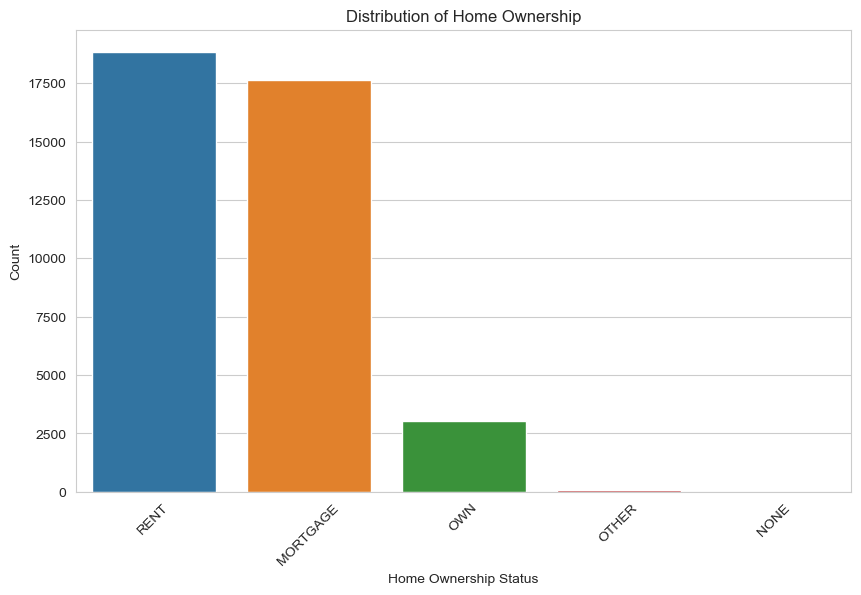

In [62]:
# create count plot for the 'home_ownership' column
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=loan_df2, order=loan_df2['home_ownership'].value_counts().index)
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels if they are too long
plt.show()


# Segmented Univariate Analysis

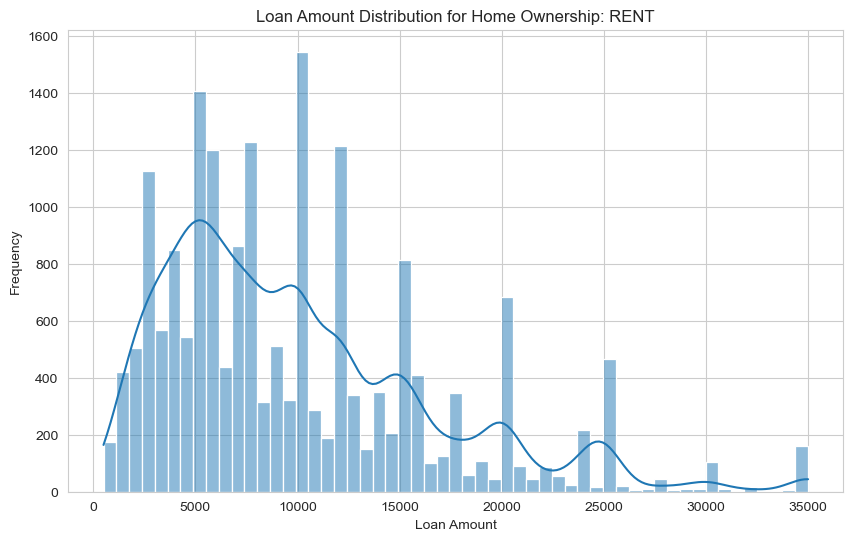

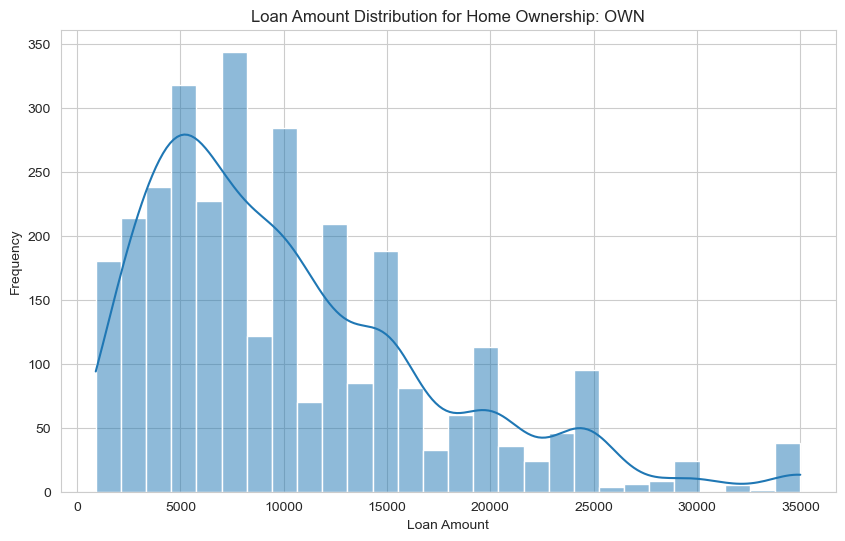

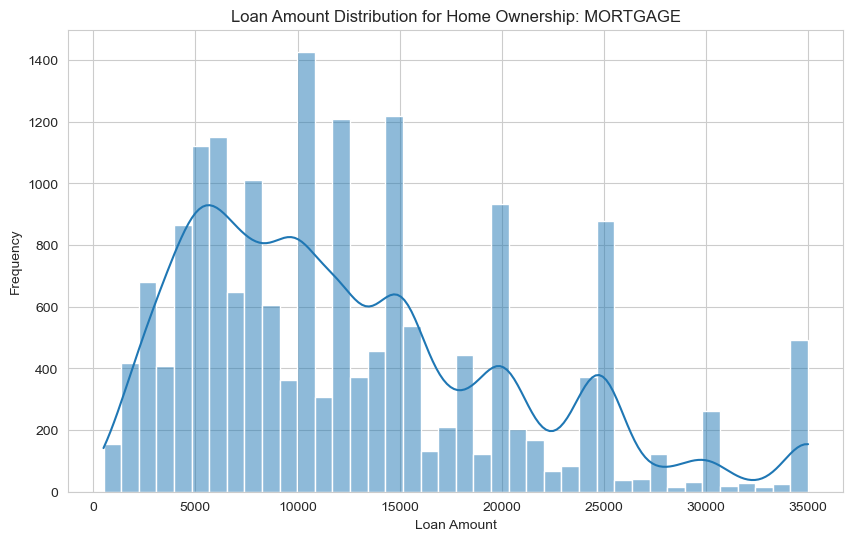

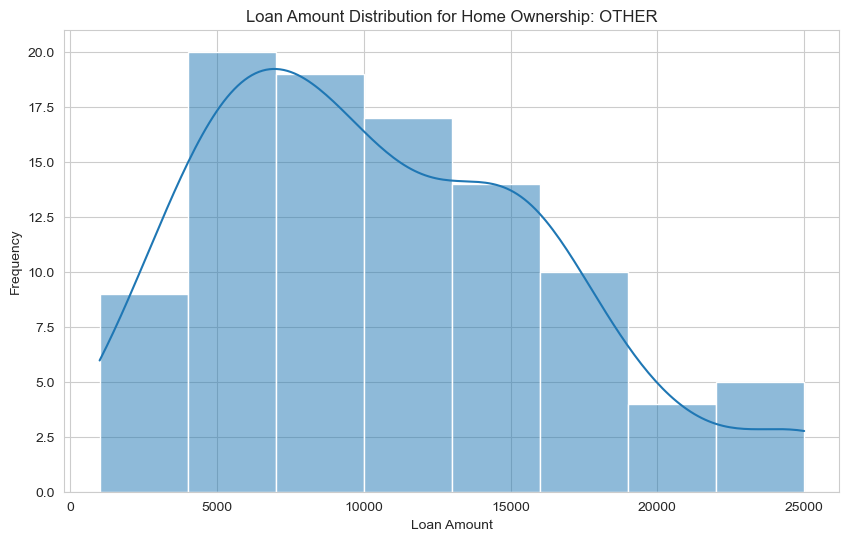

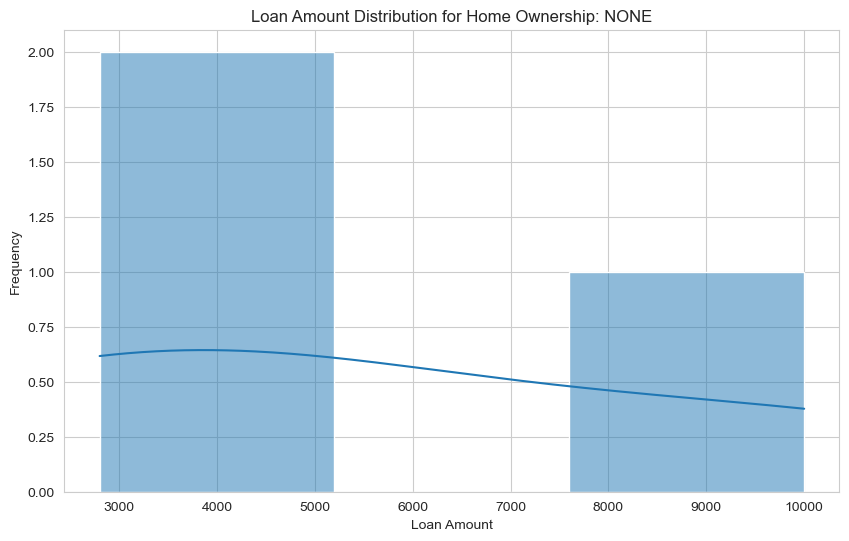

In [107]:
# Segmentation variable: home_ownership
segments = loan_df2['home_ownership'].unique()

for segment in segments:
    segment_data = loan_df2[loan_df2['home_ownership'] == segment]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(segment_data['loan_amnt'], kde=True)
    plt.title(f'Loan Amount Distribution for Home Ownership: {segment}')
    plt.xlabel('Loan Amount')
    plt.ylabel('Frequency')
    plt.show()


In [91]:
# Using pivot table


# Sample DataFrame
df = loan_df2

# List of categorical variables
categorical_vars = ['loan_status']

#categorical_vars = loan_df2.select_dtypes(include=['object']).columns

# List of numeric variables
numeric_vars = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc']
# numeric_vars = ['loan_amnt']

# Creating an empty DataFrame to store results
segmented_analysis_table = pd.DataFrame()

# Loop through categorical variables
for cat_var in categorical_vars:
    # Loop through numeric variables
    for num_var in numeric_vars:
        # Calculate the mean for each segment
        segmented_mean = df.groupby(cat_var)[num_var].mean().reset_index()
        
        # Rename the column to reflect the numeric variable name
        segmented_mean.rename(columns={num_var: f'{num_var}_mean'}, inplace=True)
        
        # If the result DataFrame is empty, initialize it with the current results
        if segmented_analysis_table.empty:
            segmented_analysis_table = segmented_mean
        else:
            # If the result DataFrame already exists, merge with the current results
            segmented_analysis_table = pd.merge(segmented_analysis_table, segmented_mean, on=cat_var, how='outer')

# After the loop, segmented_analysis_table contains the mean of each numeric variable for each category of each categorical variable
segmented_analysis_table.head()  # Display the first few rows of the table


,loan_status,loan_amnt_mean,funded_amnt_mean,int_rate_mean,installment_mean,annual_inc_mean
0,Charged Off,12154.189919,11798.654365,13.818194,337.252371,61411.761330
1,Current,17053.991228,16485.701754,15.031465,395.476061,74374.012474
2,Fully Paid,10866.755440,10618.812407,11.609897,320.134009,68030.527078


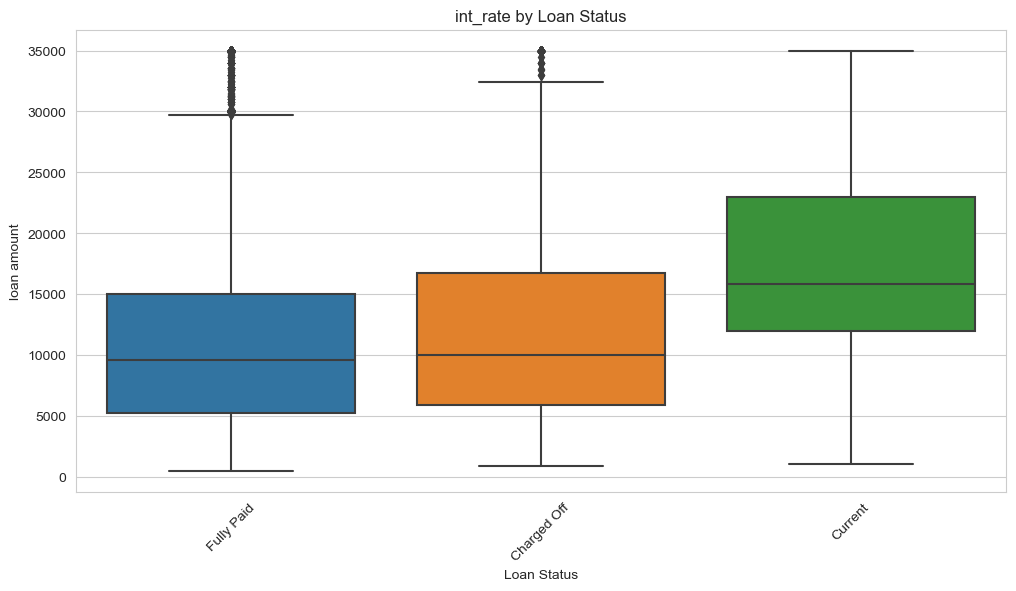

In [111]:
# 'inter_rate' with Loan Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df2)
plt.title('int_rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('loan amount')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()


In [74]:
categorical_columns = loan_df2.select_dtypes(include=['object']).columns
categorical_columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status',
       'last_pymnt_d', 'application_type'],
      dtype='object')

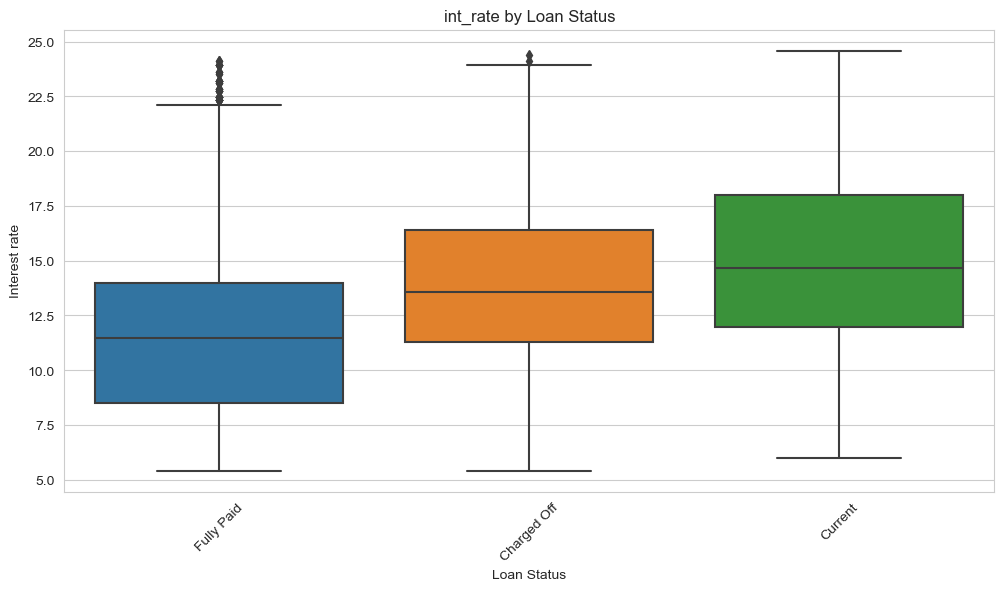

In [89]:
# 'inter_rate' with Loan Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_df2)
plt.title('int_rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest rate')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()


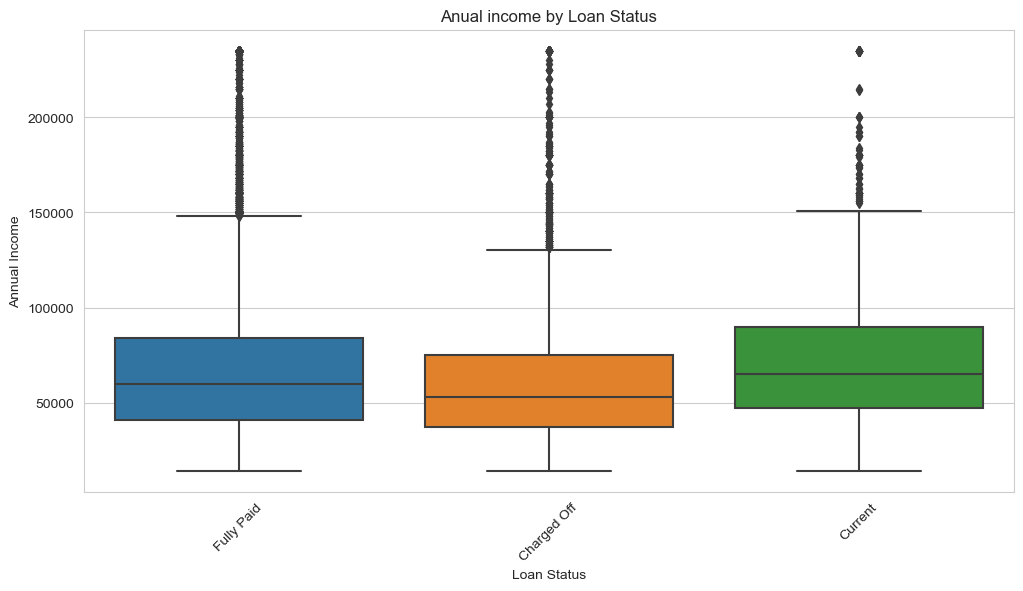

In [92]:
# annual income with Loan Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_df2)
plt.title('Anual income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

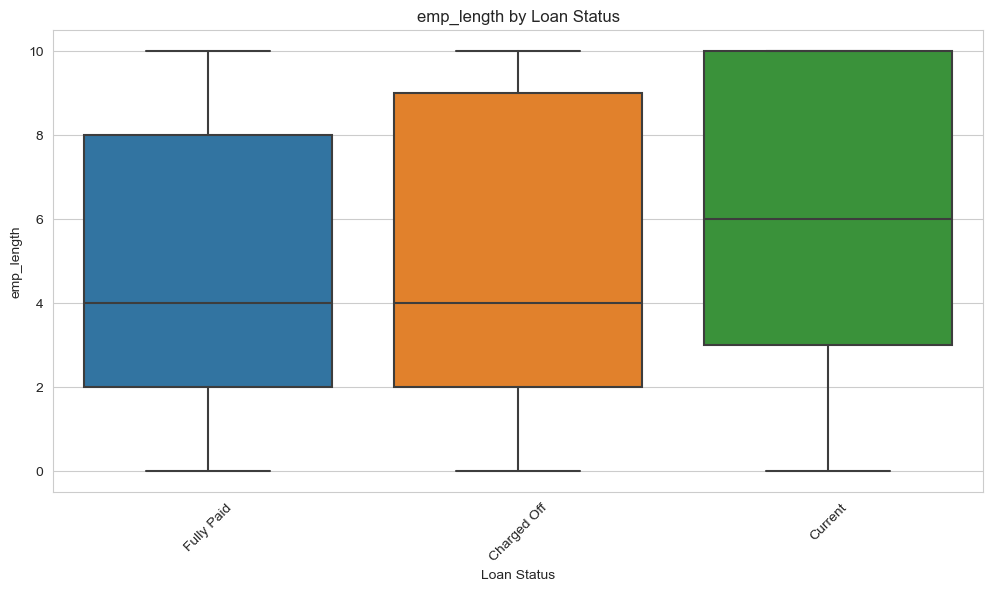

In [93]:
# emp_length  with Loan Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='emp_length', data=loan_df2)
plt.title('emp_length by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('emp_length')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

# Bivariate analysis

## Loan Amount vs installment

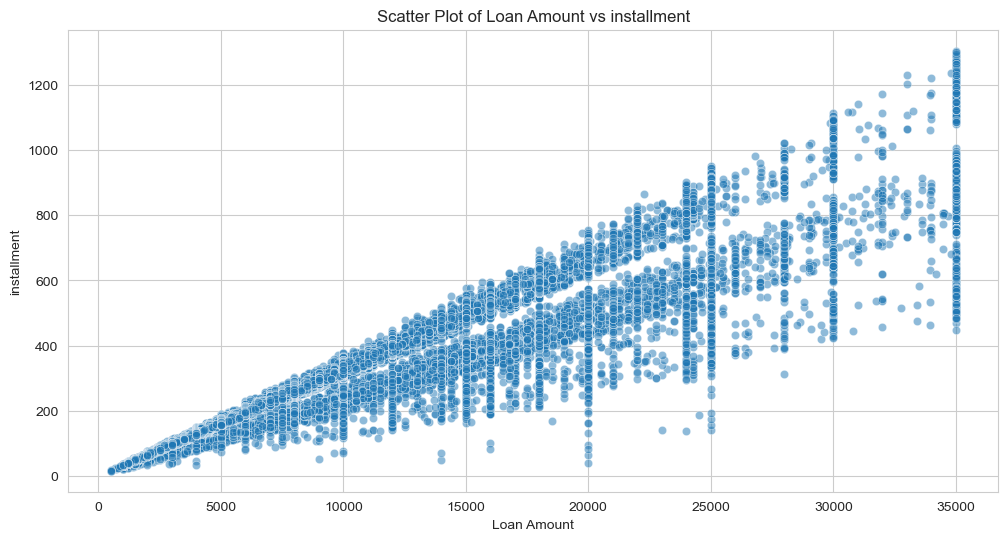

In [98]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=loan_df2, x='loan_amnt', y='installment', alpha=0.5)

# Adjust axis limits if necessary to zoom into a particular region
# plt.xlim(0, 35000)
# plt.ylim(0, 250000)

plt.title('Scatter Plot of Loan Amount vs installment')
plt.xlabel('Loan Amount')
plt.ylabel('installment')
plt.grid(True)
plt.show()




## Loan amount vs grade

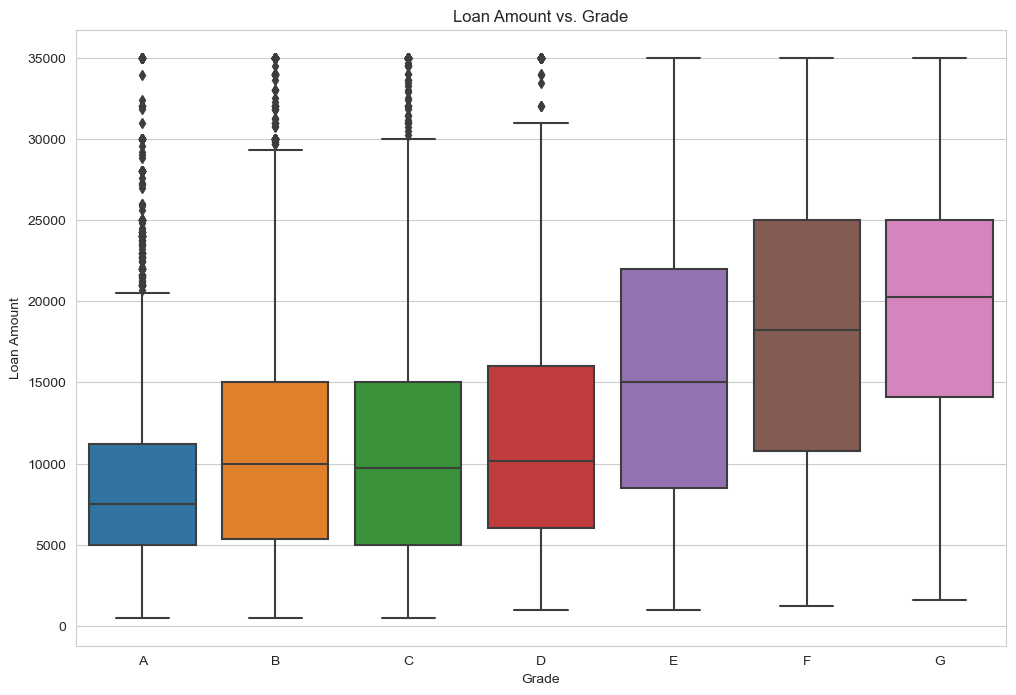

In [101]:

#  'grade' and 'loan_amnt' columns

plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.boxplot(x='grade', y='loan_amnt', data=loan_df2, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

plt.title('Loan Amount vs. Grade')  # Title of the plot
plt.xlabel('Grade')  # X-axis label
plt.ylabel('Loan Amount')  # Y-axis label
plt.show()



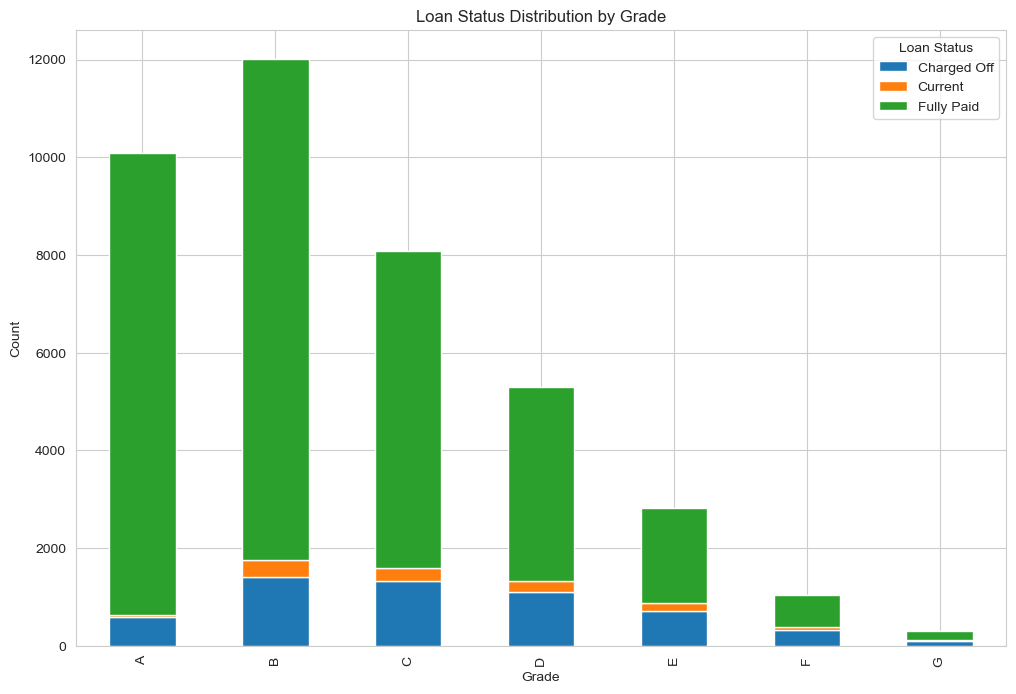

In [104]:
# Cross-tabulating loan status vs. grade
ctab = pd.crosstab(index=loan_df2['grade'], columns=loan_df2['loan_status'])

# Plotting the cross-tabulation
ctab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Loan Status Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


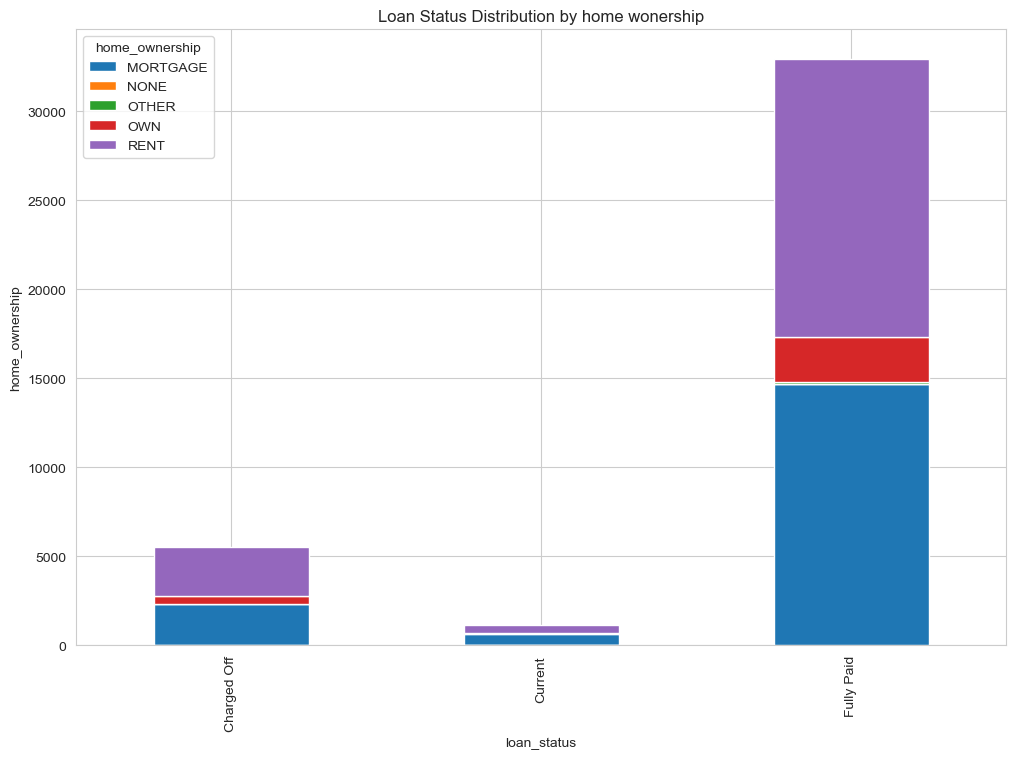

In [113]:
# Home Ownership vs. Loan Status:

ctab = pd.crosstab(index=loan_df2['loan_status'], columns=loan_df2['home_ownership'])

# Plotting the cross-tabulation
ctab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Loan Status Distribution by home wonership')
plt.xlabel('loan_status')
plt.ylabel('home_ownership')
plt.legend(title='home_ownership')
plt.show()

   annual_inc   income_group
0     24000.0     low_income
1     30000.0     low_income
2     14400.0     low_income
3     49200.0  medium_income
4     80000.0  medium_income


<Figure size 1400x700 with 0 Axes>

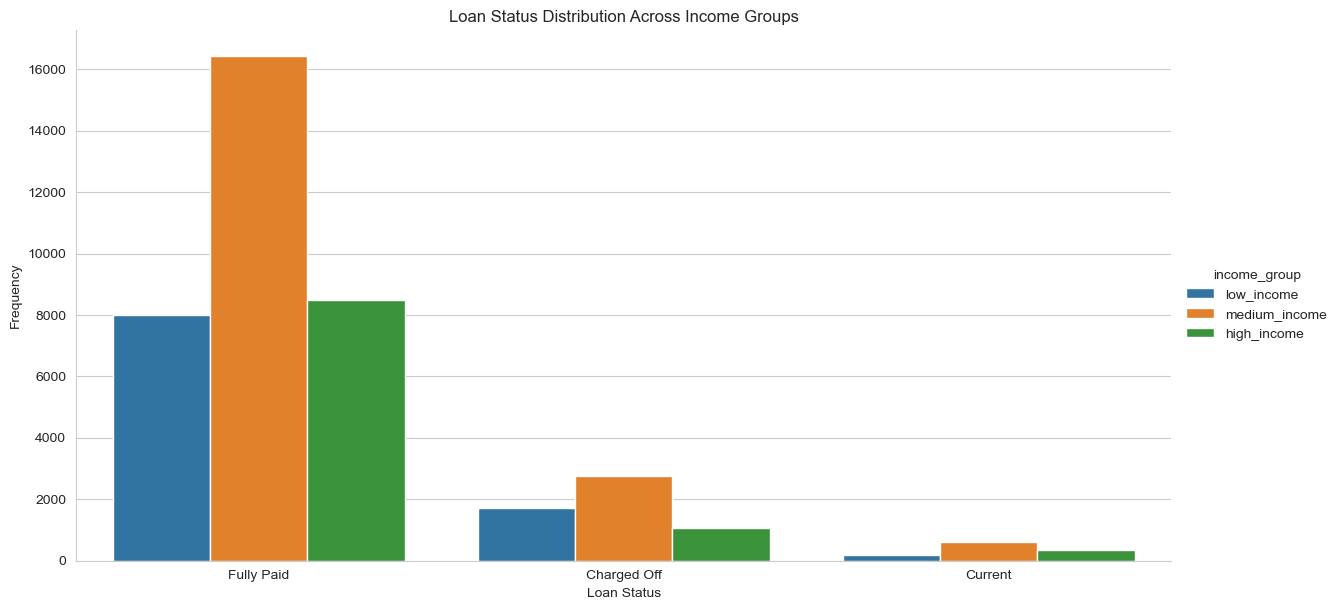

In [114]:

# Define the income categories based on quantiles
income_thresholds = loan_df2['annual_inc'].quantile([0.25, 0.75]).values
loan_df2['income_group'] = pd.cut(loan_df2['annual_inc'],
                                             bins=[0, income_thresholds[0], income_thresholds[1], float('inf')],
                                             labels=['low_income', 'medium_income', 'high_income'])

# Verify the new column is added
print(loan_df2[['annual_inc', 'income_group']].head())

# Now, create distribution plots for loan status within each income group
plt.figure(figsize=(14, 7))

# Creating a factorplot, which is now known as catplot in seaborn
sns.catplot(x='loan_status', kind='count', hue='income_group', data=loan_df2, height=6, aspect=2)
plt.title('Loan Status Distribution Across Income Groups')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

plt.show()


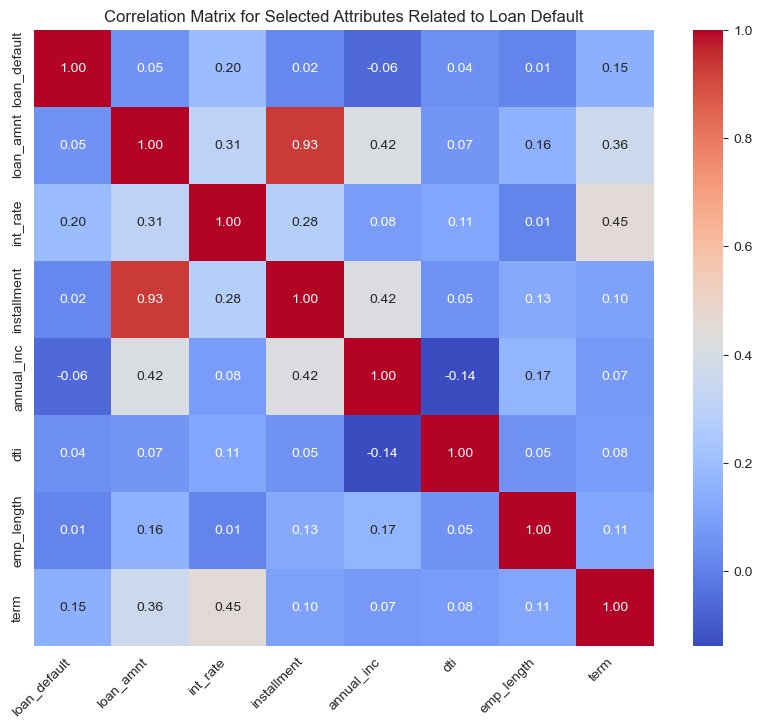

In [138]:

# Mapping loan status to a numeric value, 1 for default ("Charged Off") and 0 otherwise
loan_df2['loan_default'] = loan_df2['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Selecting important attributes for correlation analysis

important_attrs = [
    'loan_default',
    'loan_amnt',
    'int_rate',
    'installment',
    'annual_inc',
    'dti',
    'emp_length',
    'term',
       
]

# Compute the correlation matrix for the important attributes
corr_matrix = loan_df2[important_attrs].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Rotate the labels on the x-axis for better readability
plt.xticks(rotation=45, ha='right')

# Title for the heatmap
plt.title('Correlation Matrix for Selected Attributes Related to Loan Default')

plt.show()



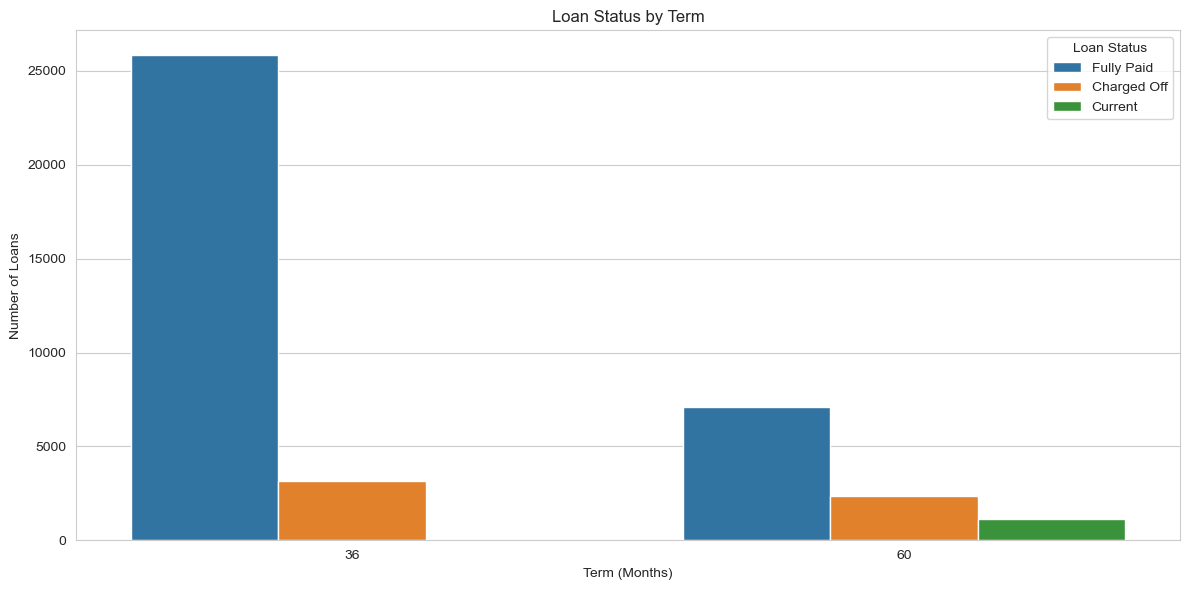

In [139]:

#'term' for the loan term and 'loan_status' for the status of the loan.

plt.figure(figsize=(12, 6))
sns.countplot(data=loan_df2, x='term', hue='loan_status')
plt.title('Loan Status by Term')
plt.xlabel('Term (Months)')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', loc='upper right')  # adjust the location of the legend as needed
plt.tight_layout()  # Adjust layout to fit the plot and annotations neatly
plt.show()
